#  	亚洲四小龙 LOS CUATRO TIGRES ASIATICOS

In [4]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import requests
import json
import os
from dotenv import load_dotenv
load_dotenv()
from src import *
import folium
import webbrowser


In [5]:
tigersmap=folium.Map(location=(35.86166,104.195397),zoom_start=3)
marc1=folium.Marker(location=(1.352083, 103.819836))
marc2=folium.Marker(location=(23.69781, 120.960515))
marc3=folium.Marker(location=(22.396428, 114.109497))
marc4=folium.Marker(location=(37.566, 126.9784))


In [6]:
marc1.add_to(tigersmap)
marc2.add_to(tigersmap)
marc3.add_to(tigersmap)
marc4.add_to(tigersmap)
tigersmap

In [7]:
tigers=pd.DataFrame({'Country':['Korea','Singapore','Hong Kong Rep','Taiwan'],
                'Capital':['Seoul','City of Singapur','Hong Kong','Taipei'],
                     
                'Country Population(hab)':['51500852','6166472','7500700','23780452'],
                     
                'Capital Population(hab)':['9806538','5638676','7500700','2646204'],
                     
                'Country Surface(km)':['100339','697000','1104400','36197000'],
                     
                'Capital Surface(km)':['60525','377737','11044','2718'],
                     
                'PIB(MM$)':['2138','554855','36995','586']
                
                
    
})
tigers

,Country,Capital,Country Population(hab),Capital Population(hab),Country Surface(km),Capital Surface(km),PIB(MM$)
0,Korea,Seoul,51500852,9806538,100339,60525,2138
1,Singapore,City of Singapur,6166472,5638676,697000,377737,554855
2,Hong Kong Rep,Hong Kong,7500700,7500700,1104400,11044,36995
3,Taiwan,Taipei,23780452,2646204,36197000,2718,586


In [8]:
tigers.dtypes

Country                    object
Capital                    object
Country Population(hab)    object
Capital Population(hab)    object
Country Surface(km)        object
Capital Surface(km)        object
PIB(MM$)                   object
dtype: object

In [9]:
tigers_country=tigers[['Country','Country Population(hab)','Country Surface(km)']]
tigers_country

,Country,Country Population(hab),Country Surface(km)
0,Korea,51500852,100339
1,Singapore,6166472,697000
2,Hong Kong Rep,7500700,1104400
3,Taiwan,23780452,36197000


In [10]:
b=tigers_country.set_index('Country')
pd.to_numeric(b['Country Population(hab)'])
pd.to_numeric(b['Country Surface(km)'])


Country
Korea              100339
Singapore          697000
Hong Kong Rep     1104400
Taiwan           36197000
Name: Country Surface(km), dtype: int64

In [11]:
tigers_capitals=tigers[['Capital','Capital Population(hab)','Capital Surface(km)']]
tigers_capitals

,Capital,Capital Population(hab),Capital Surface(km)
0,Seoul,9806538,60525
1,City of Singapur,5638676,377737
2,Hong Kong,7500700,11044
3,Taipei,2646204,2718


In [12]:
a=tigers_capitals.set_index('Capital')
pd.to_numeric(a['Capital Population(hab)'])
pd.to_numeric(a['Capital Surface(km)'])


Capital
Seoul                60525
City of Singapur    377737
Hong Kong            11044
Taipei                2718
Name: Capital Surface(km), dtype: int64

/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/laura/.local/lib/python3.8/site-packages/seaborn/distributions.p

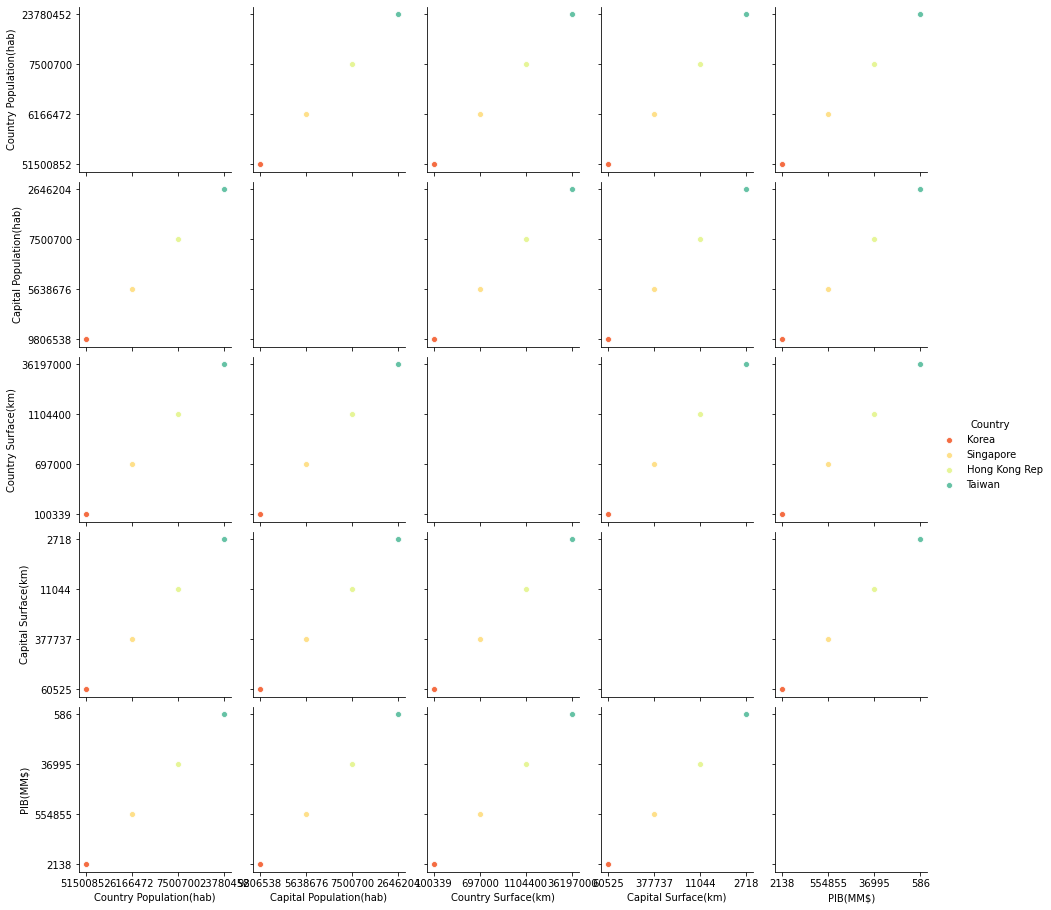

In [13]:
sns.pairplot(tigers,hue='Country',palette='Spectral')

El país que menos descentralización presenta es Singapur ya que su superficie es menor que la del resto y por tanto,los habitantes están más concentrados en un area geográfica,en este caso la capital,y por ende las empresas también,y será más sencillo cumplir con los requisitos.

In [14]:
#Importar la collection de MongoDB para poder trabajar con ella en python
dbName="companies.json"
mongodbURL = f"mongodb://localhost/{dbName}"
client = MongoClient(mongodbURL, connectTimeoutMS=2000,serverSelectionTimeoutMS=2000)
db = client.get_database()

In [36]:
#Haciendo una consulta a la db de MongoDB,se le pide que devuelva todas las oficinas que están en Singapur.
query=db.companies.find({'offices.city':'Singapore'})


In [17]:
#Se hace una nueva consulta para avergiuar cuáles de estas empresas facturan >= 1MUSD
query1=db.companies.find({'offices.country_code': 'CHN','offices.city': 'Singapore','total_money_raised': {'$gte':'1M'}})


In [26]:
#Utilizando de base las coordenadas del Downtown Core:1.352083,103.819836 se hará la búsqueda.

In [37]:
  url = 'https://api.foursquare.com/v2/venues/search'
params = dict(
        Client_Id=os.getenv("clientID"),
        Client_Secret=os.getenv("clientSecret"),
        v='20200702',
        ll='1.352083,103.819836',
        query="airport",
        
    )
resp = requests.get(url=url, params=params)

data = json.loads(resp.text)
data

{'meta': {'code': 400,
  'errorType': 'invalid_auth',
  'errorDetail': 'Missing access credentials. See https://developer.foursquare.com/docs/api/configuration/authentication for details.',
  'requestId': '5efd0b2e07a2fd0bacf1994e'},
 'response': {}}

In [19]:
getStadiumFoursquare

<function src.getStadiumFoursquare()>

In [20]:
getStarbucksFoursquare

<function src.getStarbucksFoursquare()>

In [21]:
getSchoolFoursquare

<function src.getSchoolFoursquare()>

In [22]:
getVeganFoursquare

<function src.getVeganFoursquare()>

In [23]:
getDogGroomerFoursquare

<function src.getDogGroomerFoursquare()>

In [24]:
getPubsFoursquare

<function src.getPubsFoursquare()>